In [1]:
# import the libraries necessarry for cleaning and eda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white')
plt.style.use('seaborn')

pd.set_option('display.max_columns', 100)  # display max rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # avoid outputing scientific notation

In [2]:
df = pd.read_csv('cardiac_train.csv')

In [3]:
print(df.shape)
df.head()

(50865, 13)


,age,gender,height,weight,bp_high,bp_low,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,41.39,female,1.66,77.00,160.00,100.00,normal,above normal,1,0,1,0,27.94
1,52.62,female,1.63,75.00,120.00,80.00,normal,normal,0,0,1,1,28.23
2,50.62,female,1.65,54.00,90.00,60.00,well above normal,well above normal,0,0,1,0,19.83
3,58.20,male,1.69,70.00,140.00,90.00,normal,normal,0,0,1,0,24.51
4,61.70,female,1.54,58.00,110.00,60.00,normal,normal,0,0,1,0,24.46


## EDA
___

In [4]:
df.describe().iloc[[3,1,5,6,7],:]

,age,height,weight,bp_high,bp_low,smoke,alco,active,cardio,bmi
min,29.58,1.25,32.00,60.00,40.00,0.00,0.00,0.00,0.00,15.01
mean,53.25,1.65,71.61,126.18,81.15,0.09,0.05,0.80,0.48,26.36
50%,53.92,1.65,70.00,120.00,80.00,0.00,0.00,1.00,0.00,25.86
75%,58.35,1.70,79.00,140.00,90.00,0.00,0.00,1.00,1.00,29.00
max,64.97,1.98,125.00,240.00,182.00,1.00,1.00,1.00,1.00,35.00


In [5]:
df.corr().abs()['cardio']

age       0.24
height    0.00
weight    0.15
bp_high   0.43
bp_low    0.34
smoke     0.01
alco      0.01
active    0.03
cardio    1.00
bmi       0.17
Name: cardio, dtype: float64

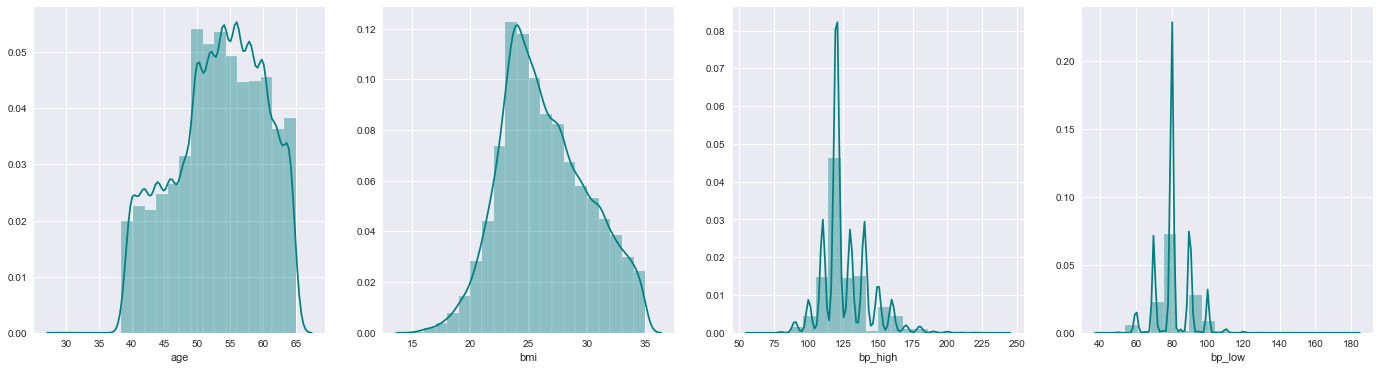

In [6]:
fig = plt.figure(figsize = (24,6))

num_cols = ['age','bmi','bp_high','bp_low',]

for n in range(0,4):
    ax = fig.add_subplot(1,4,n+1)
    sns.distplot(df[num_cols[n]], bins = 20, ax = ax, axlabel= num_cols[n],color='teal',)
plt.show()    

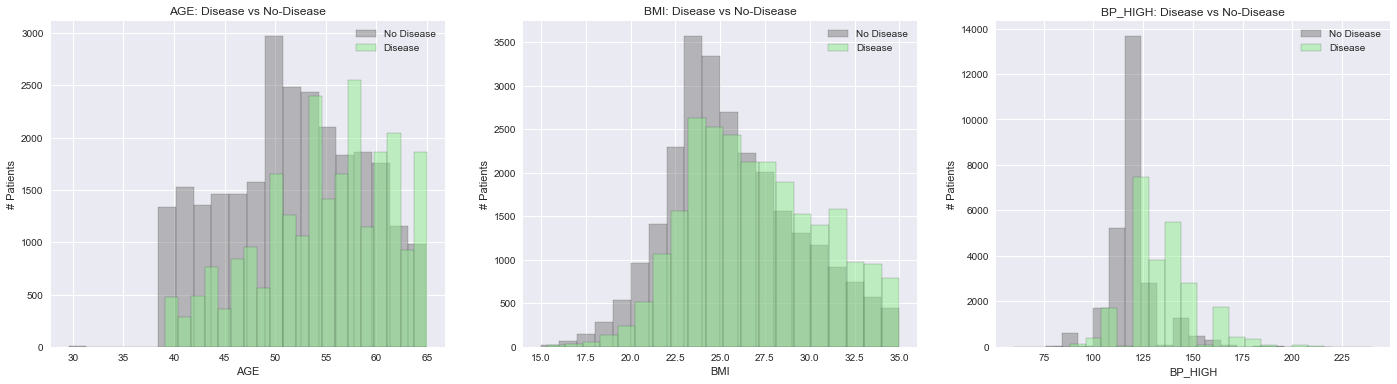

In [7]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (24,6))
fig.subplots_adjust(hspace = .30)

cols = ['age','bmi','bp_high']

for n in range(0,3):
    ax = fig.add_subplot(1,3,n+1)
    ax.hist(df[df['cardio'] ==0][cols[n]], bins = 20, label ='No Disease', alpha = .50,edgecolor= 'black',color ='grey')
    ax.hist(df[df['cardio']==1][cols[n]], bins = 20, label = 'Disease', alpha = .50, edgecolor = 'black',color = 'lightgreen')
    ax.set_title(cols[n].upper()+': Disease vs No-Disease')
    ax.set_xlabel(cols[n].upper())
    ax.set_ylabel('# Patients')
    ax.legend(loc = 'upper right')
plt.show()

## Feature Engineering
___

In [8]:
df['bmi_cat'] = pd.cut(df['bmi'], right= False, bins = [0,18.5,25,30,36], 
                       labels=['underweight','normal','overweight','obese'])
df['bmi_cat'].value_counts(dropna = False)

normal         20501
overweight     20151
obese           9729
underweight      484
Name: bmi_cat, dtype: int64

In [9]:
dummy_df = pd.get_dummies(df, columns=['bmi_cat','gender'], prefix = '', prefix_sep = '', drop_first= True)

In [10]:
dummy_df = pd.get_dummies(dummy_df, columns=['cholesterol','gluc'], prefix =['chol','gluc'],)

In [11]:
dummy_df['bp_high'].corr(df['bp_low'])

0.7388991754657869

In [12]:
dummy_df['bp_lvl'] = dummy_df['bp_high'].apply(lambda x: 'crisis' if (x >= 180) else
                                              ('hyper_2' if (x < 180) & (x >= 140) else
                                              ('hyper_1' if (x < 140) & (x >= 130) else
                                              ('normal' if (x < 130) & (x >= 90) else 'lowest'))))

In [13]:
dummy_df = pd.get_dummies(dummy_df, columns=['bp_lvl'], prefix =['bp'],)

In [14]:
dummy_df.head()

,age,height,weight,bp_high,bp_low,smoke,alco,active,cardio,bmi,normal,overweight,obese,male,chol_above normal,chol_normal,chol_well above normal,gluc_above normal,gluc_normal,gluc_well above normal,bp_crisis,bp_hyper_1,bp_hyper_2,bp_lowest,bp_normal
0,41.39,1.66,77.00,160.00,100.00,1,0,1,0,27.94,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
1,52.62,1.63,75.00,120.00,80.00,0,0,1,1,28.23,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,50.62,1.65,54.00,90.00,60.00,0,0,1,0,19.83,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,58.20,1.69,70.00,140.00,90.00,0,0,1,0,24.51,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0
4,61.70,1.54,58.00,110.00,60.00,0,0,1,0,24.46,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [15]:
target_corr = dummy_df.corr().abs()['cardio']
target_corr
#drop_cols = list(target_corr[target_corr < 0.033].index)
#print(drop_cols)

age                      0.24
height                   0.00
weight                   0.15
bp_high                  0.43
bp_low                   0.34
smoke                    0.01
alco                     0.01
active                   0.03
cardio                   1.00
bmi                      0.17
normal                   0.13
overweight               0.04
obese                    0.12
male                     0.02
chol_above normal        0.08
chol_normal              0.20
chol_well above normal   0.19
gluc_above normal        0.05
gluc_normal              0.09
gluc_well above normal   0.07
bp_crisis                0.08
bp_hyper_1               0.08
bp_hyper_2               0.40
bp_lowest                0.03
bp_normal                0.43
Name: cardio, dtype: float64

In [94]:
#dummy_df.drop(columns=drop_cols, inplace=True)

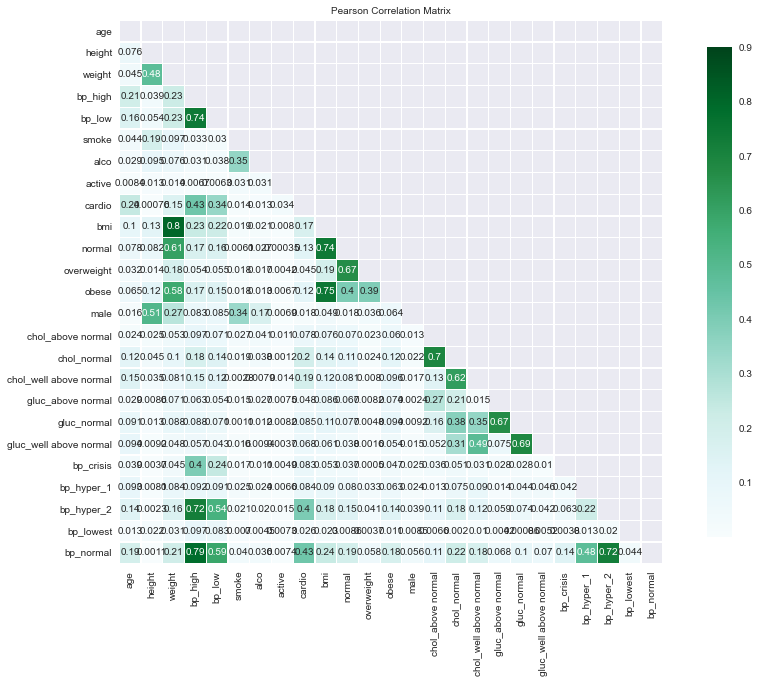

In [16]:
mask = np.zeros_like(dummy_df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 10))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(dummy_df.corr().abs(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":10},mask=mask,cbar_kws={"shrink": .9});
plt.show()

## 5. Model Fitting and Hyperparameter Tuning
___

### Normalize the data

In [17]:
norm_df = (dummy_df - dummy_df.mean())/ dummy_df.std()
norm_df['cardio'] = dummy_df['cardio']

In [18]:
norm_df.head()

,age,height,weight,bp_high,bp_low,smoke,alco,active,cardio,bmi,normal,overweight,obese,male,chol_above normal,chol_normal,chol_well above normal,gluc_above normal,gluc_normal,gluc_well above normal,bp_crisis,bp_hyper_1,bp_hyper_2,bp_lowest,bp_normal
0,-1.75,0.16,0.47,2.04,1.98,3.18,-0.24,0.49,0,0.43,-0.82,1.23,-0.49,-0.76,-0.39,0.56,-0.34,3.70,-2.48,-0.28,-0.11,-0.38,1.74,-0.03,-1.26
1,-0.09,-0.23,0.30,-0.37,-0.12,-0.31,-0.24,0.49,1,0.50,-0.82,1.23,-0.49,-0.76,-0.39,0.56,-0.34,-0.27,0.40,-0.28,-0.11,-0.38,-0.57,-0.03,0.80
2,-0.39,0.03,-1.54,-2.18,-2.22,-0.31,-0.24,0.49,0,-1.75,1.22,-0.81,-0.49,-0.76,-0.39,-1.79,2.91,-0.27,-2.48,3.60,-0.11,-0.38,-0.57,-0.03,0.80
3,0.73,0.54,-0.14,0.83,0.93,-0.31,-0.24,0.49,0,-0.50,1.22,-0.81,-0.49,1.32,-0.39,0.56,-0.34,-0.27,0.40,-0.28,-0.11,-0.38,1.74,-0.03,-1.26
4,1.25,-1.39,-1.19,-0.98,-2.22,-0.31,-0.24,0.49,0,-0.51,1.22,-0.81,-0.49,-0.76,-0.39,0.56,-0.34,-0.27,0.40,-0.28,-0.11,-0.38,-0.57,-0.03,0.80


In [19]:
# Split data to be used in the models
X = norm_df.drop(columns=['cardio'], axis = 1) # grabs everything else but 'catdio', creating a matrix of features

y = norm_df['cardio'] # y is the column we're trying to predict 

In [20]:
y.value_counts(normalize=True)

0   0.52
1   0.48
Name: cardio, dtype: float64

In [21]:
X.shape

(50865, 24)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23, )

### Logistic Regression Classifier
___

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, f1_score, recall_score

In [25]:
lr = LogisticRegression()

param_dict={'solver':['liblinear','lbgfs'], 'C': [0.5, 0.6, 0.7, 0.8],
           'penalty': ['l1','l2']}

grid_tree= GridSearchCV(lr, param_dict, cv=5, scoring='recall', verbose=1, n_jobs=-1)

In [26]:
#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   21.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.5, 0.6, 0.7, 0.8], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbgfs']},
             scoring='recall', verbose=1)

In [27]:
print(grid_tree.best_score_)

print(grid_tree.best_params_)

print(grid_tree.best_estimator_)

0.6291698402051455
{'C': 0.6, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.6, solver='liblinear')


In [28]:
train_pred = grid_tree.best_estimator_.predict(X_train)
y_pred = grid_tree.best_estimator_.predict(X_test)

print('Train Recall: ', recall_score(y_train, train_pred ))
print("Test Recall:", recall_score(y_test, y_pred), '\n')
print("Test F1:", f1_score(y_test, y_pred))

Train Recall:  0.6290618590089604
Test Recall: 0.6360172299536117 

Test F1: 0.6945901935950787


### Decision-Tree Classifier
___

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
decision_tree = DecisionTreeClassifier(random_state=1)

In [47]:
# creating our parameters to test
param_dict={'max_depth': [4,5,6], 'min_samples_leaf':[300,325,350,375,400], 'criterion': ['gini','entropy'],
           'max_features': range(12,16)}

In [48]:
#create the instance of GridSearchCV using the F1 metric for our scoring. 
grid_tree= GridSearchCV(decision_tree, param_dict, cv=5, scoring='recall', verbose=1, n_jobs=-1)

In [49]:
#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6], 'max_features': range(12, 16),
                         'min_samples_leaf': [300, 325, 350, 375, 400]},
             scoring='recall', verbose=1)

In [50]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.7154270457579458
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 15, 'min_samples_leaf': 325}
DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=15,
                       min_samples_leaf=325, random_state=1)


In [51]:
train_pred = grid_tree.best_estimator_.predict(X_train)
y_pred = grid_tree.best_estimator_.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, y_pred), '\n')

print('Train recall: ', recall_score(y_train, train_pred ))
print("Test recall:", recall_score(y_test, y_pred))

Test accuracy: 0.7342926790909806 

Train recall:  0.7037676778581453
Test recall: 0.7150430748840292


### KNN Classifier
___

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [79]:
param_dict = {'n_neighbors': [3,5,7,9], 'metric': ['minkowski','euclidean','manhattan']}

In [80]:
grid_tree= GridSearchCV(knn, param_dict, cv=5, scoring='recall', verbose=1, n_jobs=-1)

In [81]:
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.6s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'], 'n_neighbors': [3],
                         'weights': ['uniform']},
             scoring='recall', verbose=1)

In [84]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.6615563629901688
{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=3)


In [83]:
y_pred = grid_tree.best_estimator_.predict(X_test)
train_pred = grid_tree.best_estimator_.predict(X_train)

print('Train Recall: ', recall_score(y_train, train_pred ))
print("Test Recall:", recall_score(y_test, y_pred), '\n')
print("Test F1:", f1_score(y_test, y_pred))

Train Recall:  0.8084853719097485
Test Recall: 0.6583830351225978 

Test F1: 0.6594756057085961


### Voting Classifier
___

In [68]:
from sklearn.ensemble import VotingClassifier

In [102]:
lr_clf = LogisticRegression(C=0.6, solver='liblinear')

dct_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=15, min_samples_leaf=325, random_state=1)

knn_clf = KNeighborsClassifier(n_neighbors=3)

rf_clf = RandomForestClassifier(criterion='entropy', max_depth=6, max_features=15,
                       n_estimators=200)

In [108]:
voting_clf = VotingClassifier(
                estimators=[('logreg', lr_clf), ('decisiontree', dct_clf),
                            ('RandomForest', rf_clf)], voting='hard')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
train_pred = voting_clf.predict(X_train)

print('Train Recall: ', recall_score(y_train, train_pred ))
print("Test Recall:", recall_score(y_test, y_pred), '\n')
print("Test F1:", f1_score(y_test, y_pred))

Train Recall:  0.6871963726654432
Test Recall: 0.6931742876076872 

Test F1: 0.7172981313217898


### Random Forest Cl

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf = RandomForestClassifier()

In [95]:
param_grid = { 
    'n_estimators': [200,300,400,500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,6,8,10,12],
    'max_features': list(range(11,16))
}

In [96]:
grid_tree=GridSearchCV(rf, param_grid, cv=5, scoring='recall', verbose=1, n_jobs=-1)

In [97]:
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 990 out of 990 | elapsed: 29.4min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                          15],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [98]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.6731622717801603
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 15, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', max_depth=6, max_features=15,
                       n_estimators=200)


In [99]:
y_pred = grid_tree.best_estimator_.predict(X_test)
train_pred = grid_tree.best_estimator_.predict(X_train)

print('Train Recall: ', recall_score(y_train, train_pred ))
print("Test Recall:", recall_score(y_test, y_pred), '\n')
print("Test F1:", f1_score(y_test, y_pred))

Train Recall:  0.6823923135053438
Test Recall: 0.6827369118621603 

Test F1: 0.7140258165121718
